In [0]:
import pandas as pd
import pyspark
import numpy as np

In [0]:
storage_account_name = "flightpricepred"
storage_account_access_key = "ghH+lolFOuRvosI/3+RYFaOmLFltKhhx2IGb2e3xpwE1n+WcMIyd5BA9CzhanLcG63vt8h+HXqyx+AStzNQ/mw=="

In [0]:
spark.conf.set(
  "fs.azure.account.key."+storage_account_name+".blob.core.windows.net",
  storage_account_access_key)

In [0]:
file_location = "wasbs://datasets@flightpricepred.blob.core.windows.net/fd1.csv"
# wasbs = windows-azure-storage-blob
file_type = "csv"

In [0]:
df1 = spark.read.format(file_type).option("inferSchema", "true").option("header", "true").load(file_location)

In [0]:
df1.show()

+---+---------+-------+-----------+--------------+-----+-------------+----------------+-------+--------+---------+-----+
|_c0|  airline| flight|source_city|departure_time|stops| arrival_time|destination_city|  class|duration|days_left|price|
+---+---------+-------+-----------+--------------+-----+-------------+----------------+-------+--------+---------+-----+
|  0| SpiceJet|SG-8709|      Delhi|       Evening| zero|        Night|          Mumbai|Economy|    2.17|        1| 5953|
|  1| SpiceJet|SG-8157|      Delhi| Early_Morning| zero|      Morning|          Mumbai|Economy|    2.33|        1| 5953|
|  2|  AirAsia| I5-764|      Delhi| Early_Morning| zero|Early_Morning|          Mumbai|Economy|    2.17|        1| 5956|
|  3|  Vistara| UK-995|      Delhi|       Morning| zero|    Afternoon|          Mumbai|Economy|    2.25|        1| 5955|
|  4|  Vistara| UK-963|      Delhi|       Morning| zero|      Morning|          Mumbai|Economy|    2.33|        1| 5955|
|  5|  Vistara| UK-945|      Del

In [0]:
file_location2 = "wasbs://datasets@flightpricepred.blob.core.windows.net/fd2.csv"

In [0]:
df2 = spark.read.format(file_type).option("inferSchema", "true").option("header", "true").load(file_location2)

In [0]:
df2.show()

+---------------+-----------+---------+-----------+-------+------+------------+-----------+------------+-----------+-----------------+---------+----+
|Date_of_journey|Journey_day|  Airline|Flight_code|  Class|Source|   Departure|Total_stops|     Arrival|Destination|Duration_in_hours|Days_left|Fare|
+---------------+-----------+---------+-----------+-------+------+------------+-----------+------------+-----------+-----------------+---------+----+
|     2023-01-16|     Monday| SpiceJet|    SG-8169|Economy| Delhi|  After 6 PM|   non-stop|  After 6 PM|     Mumbai|           2.0833|        1|5335|
|     2023-01-16|     Monday|   Indigo|    6E-2519|Economy| Delhi|  After 6 PM|   non-stop| Before 6 AM|     Mumbai|           2.3333|        1|5899|
|     2023-01-16|     Monday| GO FIRST|     G8-354|Economy| Delhi|  After 6 PM|   non-stop| Before 6 AM|     Mumbai|           2.1667|        1|5801|
|     2023-01-16|     Monday| SpiceJet|    SG-8709|Economy| Delhi|  After 6 PM|   non-stop|  After 6

In [0]:
df1.printSchema()

root
 |-- _c0: integer (nullable = true)
 |-- airline: string (nullable = true)
 |-- flight: string (nullable = true)
 |-- source_city: string (nullable = true)
 |-- departure_time: string (nullable = true)
 |-- stops: string (nullable = true)
 |-- arrival_time: string (nullable = true)
 |-- destination_city: string (nullable = true)
 |-- class: string (nullable = true)
 |-- duration: double (nullable = true)
 |-- days_left: integer (nullable = true)
 |-- price: integer (nullable = true)



In [0]:
df2.printSchema()

root
 |-- Date_of_journey: date (nullable = true)
 |-- Journey_day: string (nullable = true)
 |-- Airline: string (nullable = true)
 |-- Flight_code: string (nullable = true)
 |-- Class: string (nullable = true)
 |-- Source: string (nullable = true)
 |-- Departure: string (nullable = true)
 |-- Total_stops: string (nullable = true)
 |-- Arrival: string (nullable = true)
 |-- Destination: string (nullable = true)
 |-- Duration_in_hours: double (nullable = true)
 |-- Days_left: integer (nullable = true)
 |-- Fare: integer (nullable = true)



In [0]:
df2 = df2.drop('Date_of_journey','Journey_day')

In [0]:
df2.show()

+---------+-----------+-------+------+------------+-----------+------------+-----------+-----------------+---------+----+
|  Airline|Flight_code|  Class|Source|   Departure|Total_stops|     Arrival|Destination|Duration_in_hours|Days_left|Fare|
+---------+-----------+-------+------+------------+-----------+------------+-----------+-----------------+---------+----+
| SpiceJet|    SG-8169|Economy| Delhi|  After 6 PM|   non-stop|  After 6 PM|     Mumbai|           2.0833|        1|5335|
|   Indigo|    6E-2519|Economy| Delhi|  After 6 PM|   non-stop| Before 6 AM|     Mumbai|           2.3333|        1|5899|
| GO FIRST|     G8-354|Economy| Delhi|  After 6 PM|   non-stop| Before 6 AM|     Mumbai|           2.1667|        1|5801|
| SpiceJet|    SG-8709|Economy| Delhi|  After 6 PM|   non-stop|  After 6 PM|     Mumbai|           2.0833|        1|5794|
|Air India|     AI-805|Economy| Delhi|  After 6 PM|   non-stop|  After 6 PM|     Mumbai|           2.1667|        1|5955|
|Air India|     AI-605|E

In [0]:
df2 = df2.withColumnRenamed('Airline', 'airline') \
         .withColumnRenamed('Flight_code', 'flight') \
         .withColumnRenamed('Class', 'class') \
         .withColumnRenamed('Source', 'source_city') \
         .withColumnRenamed('Departure', 'departure_time') \
         .withColumnRenamed('Total_stops', 'stops') \
         .withColumnRenamed('Arrival', 'arrival_time') \
         .withColumnRenamed('Destination', 'destination_city') \
         .withColumnRenamed('Duration_in_hours', 'duration') \
         .withColumnRenamed('Days_left', 'days_left') \
         .withColumnRenamed('Fare', 'price')

In [0]:
df2.printSchema()

root
 |-- airline: string (nullable = true)
 |-- flight: string (nullable = true)
 |-- class: string (nullable = true)
 |-- source_city: string (nullable = true)
 |-- departure_time: string (nullable = true)
 |-- stops: string (nullable = true)
 |-- arrival_time: string (nullable = true)
 |-- destination_city: string (nullable = true)
 |-- duration: double (nullable = true)
 |-- days_left: integer (nullable = true)
 |-- price: integer (nullable = true)



In [0]:
df1 = df1.drop('_c0')

In [0]:
df1.printSchema()

root
 |-- airline: string (nullable = true)
 |-- flight: string (nullable = true)
 |-- source_city: string (nullable = true)
 |-- departure_time: string (nullable = true)
 |-- stops: string (nullable = true)
 |-- arrival_time: string (nullable = true)
 |-- destination_city: string (nullable = true)
 |-- class: string (nullable = true)
 |-- duration: double (nullable = true)
 |-- days_left: integer (nullable = true)
 |-- price: integer (nullable = true)



In [0]:
departure_counts2 = df2.groupBy('departure_time').count()
departure_counts2.show()

+--------------+------+
|departure_time| count|
+--------------+------+
|    After 6 PM|127969|
|   Before 6 AM| 23365|
|  12 PM - 6 PM|115774|
|  6 AM - 12 PM|184980|
+--------------+------+



In [0]:
departure_counts1 = df1.groupBy('departure_time').count()
departure_counts1.show()

+--------------+-----+
|departure_time|count|
+--------------+-----+
|       Evening|65102|
|       Morning|71146|
|    Late_Night| 1306|
|     Afternoon|47794|
| Early_Morning|66790|
|         Night|48015|
+--------------+-----+



In [0]:
from pyspark.sql import SparkSession
from pyspark.sql import functions as F

In [0]:
df1 = df1.withColumn('arrival_time',
    F.when(df1['arrival_time'] == 'Morning', '6 AM - 12 PM')
    .when(df1['arrival_time'] == 'Early_Morning', 'Before 6 AM')
    .when(df1['arrival_time'] == 'Evening', 'After 6 PM')
    .when(df1['arrival_time'] == 'Night', 'After 6 PM')
    .when(df1['arrival_time'] == 'Late_Night', 'After 6 PM')
    .when(df1['arrival_time'] == 'Afternoon', '12 PM - 6 PM')
    .otherwise(df1['arrival_time'])
).withColumn('arrival_time', F.expr('arrival_time'))

In [0]:
df1 = df1.withColumn('departure_time',
    F.when(df1['departure_time'] == 'Morning', '6 AM - 12 PM')
    .when(df1['departure_time'] == 'Early_Morning', 'Before 6 AM')
    .when(df1['departure_time'] == 'Evening', 'After 6 PM')
    .when(df1['departure_time'] == 'Night', 'After 6 PM')
    .when(df1['departure_time'] == 'Late_Night', 'After 6 PM')
    .when(df1['departure_time'] == 'Afternoon', '12 PM - 6 PM')
    .otherwise(df1['departure_time'])
).withColumn('departure_time', F.expr('departure_time'))

In [0]:
df1.show()

+---------+-------+-----------+--------------+-----+------------+----------------+-------+--------+---------+-----+
|  airline| flight|source_city|departure_time|stops|arrival_time|destination_city|  class|duration|days_left|price|
+---------+-------+-----------+--------------+-----+------------+----------------+-------+--------+---------+-----+
| SpiceJet|SG-8709|      Delhi|    After 6 PM| zero|  After 6 PM|          Mumbai|Economy|    2.17|        1| 5953|
| SpiceJet|SG-8157|      Delhi|   Before 6 AM| zero|6 AM - 12 PM|          Mumbai|Economy|    2.33|        1| 5953|
|  AirAsia| I5-764|      Delhi|   Before 6 AM| zero| Before 6 AM|          Mumbai|Economy|    2.17|        1| 5956|
|  Vistara| UK-995|      Delhi|  6 AM - 12 PM| zero|12 PM - 6 PM|          Mumbai|Economy|    2.25|        1| 5955|
|  Vistara| UK-963|      Delhi|  6 AM - 12 PM| zero|6 AM - 12 PM|          Mumbai|Economy|    2.33|        1| 5955|
|  Vistara| UK-945|      Delhi|  6 AM - 12 PM| zero|12 PM - 6 PM|       

In [0]:
df2.show()

+---------+-------+-------+-----------+--------------+--------+------------+----------------+--------+---------+-----+
|  airline| flight|  class|source_city|departure_time|   stops|arrival_time|destination_city|duration|days_left|price|
+---------+-------+-------+-----------+--------------+--------+------------+----------------+--------+---------+-----+
| SpiceJet|SG-8169|Economy|      Delhi|    After 6 PM|non-stop|  After 6 PM|          Mumbai|  2.0833|        1| 5335|
|   Indigo|6E-2519|Economy|      Delhi|    After 6 PM|non-stop| Before 6 AM|          Mumbai|  2.3333|        1| 5899|
| GO FIRST| G8-354|Economy|      Delhi|    After 6 PM|non-stop| Before 6 AM|          Mumbai|  2.1667|        1| 5801|
| SpiceJet|SG-8709|Economy|      Delhi|    After 6 PM|non-stop|  After 6 PM|          Mumbai|  2.0833|        1| 5794|
|Air India| AI-805|Economy|      Delhi|    After 6 PM|non-stop|  After 6 PM|          Mumbai|  2.1667|        1| 5955|
|Air India| AI-605|Economy|      Delhi|    After

In [0]:
df2 = df2.withColumn('stops',
    F.when(df2['stops'] == 'non-stop', 'zero')
    .when(df2['stops'] == '1-stop', 'one')
    .when(df2['stops'] == '2+-stop', 'two_or_more')
    .otherwise(df2['stops'])
).withColumn('stops', F.expr('stops'))

In [0]:
df2.show()

+---------+-------+-------+-----------+--------------+-----+------------+----------------+--------+---------+-----+
|  airline| flight|  class|source_city|departure_time|stops|arrival_time|destination_city|duration|days_left|price|
+---------+-------+-------+-----------+--------------+-----+------------+----------------+--------+---------+-----+
| SpiceJet|SG-8169|Economy|      Delhi|    After 6 PM| zero|  After 6 PM|          Mumbai|  2.0833|        1| 5335|
|   Indigo|6E-2519|Economy|      Delhi|    After 6 PM| zero| Before 6 AM|          Mumbai|  2.3333|        1| 5899|
| GO FIRST| G8-354|Economy|      Delhi|    After 6 PM| zero| Before 6 AM|          Mumbai|  2.1667|        1| 5801|
| SpiceJet|SG-8709|Economy|      Delhi|    After 6 PM| zero|  After 6 PM|          Mumbai|  2.0833|        1| 5794|
|Air India| AI-805|Economy|      Delhi|    After 6 PM| zero|  After 6 PM|          Mumbai|  2.1667|        1| 5955|
|Air India| AI-605|Economy|      Delhi|    After 6 PM| zero|  After 6 PM

In [0]:
df2.show(1)

+--------+-------+-------+-----------+--------------+-----+------------+----------------+--------+---------+-----+
| airline| flight|  class|source_city|departure_time|stops|arrival_time|destination_city|duration|days_left|price|
+--------+-------+-------+-----------+--------------+-----+------------+----------------+--------+---------+-----+
|SpiceJet|SG-8169|Economy|      Delhi|    After 6 PM| zero|  After 6 PM|          Mumbai|  2.0833|        1| 5335|
+--------+-------+-------+-----------+--------------+-----+------------+----------------+--------+---------+-----+
only showing top 1 row



In [0]:
df1.show(1)

+--------+-------+-----------+--------------+-----+------------+----------------+-------+--------+---------+-----+
| airline| flight|source_city|departure_time|stops|arrival_time|destination_city|  class|duration|days_left|price|
+--------+-------+-----------+--------------+-----+------------+----------------+-------+--------+---------+-----+
|SpiceJet|SG-8709|      Delhi|    After 6 PM| zero|  After 6 PM|          Mumbai|Economy|    2.17|        1| 5953|
+--------+-------+-----------+--------------+-----+------------+----------------+-------+--------+---------+-----+
only showing top 1 row



In [0]:
df2 = df2.withColumn('class',
    F.when(df2['class'] == 'Premium Economy', 'Economy')
    .when(df2['class'] == 'First', 'Business')
    .otherwise(df2['class'])
).withColumn('class', F.expr('class'))

In [0]:
class_counts1 = df1.groupBy('class').count()
class_counts1.show()

+--------+------+
|   class| count|
+--------+------+
| Economy|206666|
|Business| 93487|
+--------+------+



In [0]:
class_counts2 = df2.groupBy('class').count()
class_counts2.show()

+--------+------+
|   class| count|
+--------+------+
|Business|126978|
| Economy|325110|
+--------+------+



In [0]:
df2 = df2.withColumn('airline',
    F.when(df2['airline'] == 'Air India', 'Air_India')
    .when(df2['airline'] == 'GO FIRST', 'GO_FIRST')
    .otherwise(df2['airline'])
).withColumn('airline', F.expr('airline'))

In [0]:
df2.show()

+---------+-------+-------+-----------+--------------+-----+------------+----------------+--------+---------+-----+
|  airline| flight|  class|source_city|departure_time|stops|arrival_time|destination_city|duration|days_left|price|
+---------+-------+-------+-----------+--------------+-----+------------+----------------+--------+---------+-----+
| SpiceJet|SG-8169|Economy|      Delhi|    After 6 PM| zero|  After 6 PM|          Mumbai|  2.0833|        1| 5335|
|   Indigo|6E-2519|Economy|      Delhi|    After 6 PM| zero| Before 6 AM|          Mumbai|  2.3333|        1| 5899|
| GO_FIRST| G8-354|Economy|      Delhi|    After 6 PM| zero| Before 6 AM|          Mumbai|  2.1667|        1| 5801|
| SpiceJet|SG-8709|Economy|      Delhi|    After 6 PM| zero|  After 6 PM|          Mumbai|  2.0833|        1| 5794|
|Air_India| AI-805|Economy|      Delhi|    After 6 PM| zero|  After 6 PM|          Mumbai|  2.1667|        1| 5955|
|Air_India| AI-605|Economy|      Delhi|    After 6 PM| zero|  After 6 PM

In [0]:
df1.show()

+---------+-------+-----------+--------------+-----+------------+----------------+-------+--------+---------+-----+
|  airline| flight|source_city|departure_time|stops|arrival_time|destination_city|  class|duration|days_left|price|
+---------+-------+-----------+--------------+-----+------------+----------------+-------+--------+---------+-----+
| SpiceJet|SG-8709|      Delhi|    After 6 PM| zero|  After 6 PM|          Mumbai|Economy|    2.17|        1| 5953|
| SpiceJet|SG-8157|      Delhi|   Before 6 AM| zero|6 AM - 12 PM|          Mumbai|Economy|    2.33|        1| 5953|
|  AirAsia| I5-764|      Delhi|   Before 6 AM| zero| Before 6 AM|          Mumbai|Economy|    2.17|        1| 5956|
|  Vistara| UK-995|      Delhi|  6 AM - 12 PM| zero|12 PM - 6 PM|          Mumbai|Economy|    2.25|        1| 5955|
|  Vistara| UK-963|      Delhi|  6 AM - 12 PM| zero|6 AM - 12 PM|          Mumbai|Economy|    2.33|        1| 5955|
|  Vistara| UK-945|      Delhi|  6 AM - 12 PM| zero|12 PM - 6 PM|       

In [0]:
merged = df1.unionByName(df2)

In [0]:
merged.count()

752241

In [0]:
merged.show()

+---------+-------+-----------+--------------+-----+------------+----------------+-------+--------+---------+-----+
|  airline| flight|source_city|departure_time|stops|arrival_time|destination_city|  class|duration|days_left|price|
+---------+-------+-----------+--------------+-----+------------+----------------+-------+--------+---------+-----+
| SpiceJet|SG-8709|      Delhi|    After 6 PM| zero|  After 6 PM|          Mumbai|Economy|    2.17|        1| 5953|
| SpiceJet|SG-8157|      Delhi|   Before 6 AM| zero|6 AM - 12 PM|          Mumbai|Economy|    2.33|        1| 5953|
|  AirAsia| I5-764|      Delhi|   Before 6 AM| zero| Before 6 AM|          Mumbai|Economy|    2.17|        1| 5956|
|  Vistara| UK-995|      Delhi|  6 AM - 12 PM| zero|12 PM - 6 PM|          Mumbai|Economy|    2.25|        1| 5955|
|  Vistara| UK-963|      Delhi|  6 AM - 12 PM| zero|6 AM - 12 PM|          Mumbai|Economy|    2.33|        1| 5955|
|  Vistara| UK-945|      Delhi|  6 AM - 12 PM| zero|12 PM - 6 PM|       

In [0]:
#Airlines having highest number of flights
#Top 5 long duration flights
#Top 5 short duration flights
#Counts of flights as per arrival time
#Top 5 highest earning

In [0]:

spark.read.option("header","true").csv("wasbs://datasets@flightpricepred.blob.core.windows.net/merged_data/part-00000-tid-2571405265248926845-db318815-a131-4581-a630-e7958a21c43e-70-1-c000.csv").createOrReplaceTempView("FPMerged")


In [0]:
# https://flightpricepred.blob.core.windows.net/datasets/merged_data/part-00000-tid-2843023808892750788-a6b290f2-cb55-4edd-b872-810c5e3b8b8c-429-1-c000.csv

In [0]:
#highest price flights
spark.sql("select distinct(airline), max(price) as pp from FPMerged group by airline").show()

+-----------+----+
|    airline|  pp|
+-----------+----+
|    AirAsia|9999|
|  Air_India|9999|
|   AkasaAir|9938|
|AllianceAir|7792|
|   GO_FIRST|9999|
|     Indigo|9999|
|   SpiceJet|9995|
|    StarAir|9536|
|    Vistara|9998|
+-----------+----+



In [0]:
#airlines having highest number of flights
spark.sql("select airline, count(flight) as f_count from FPmerged group by airline order by f_count desc").show()



+-----------+-------+
|    airline|f_count|
+-----------+-------+
|    Vistara| 359349|
|  Air_India| 200733|
|     Indigo| 108779|
|   GO_FIRST|  33959|
|    AirAsia|  31862|
|   SpiceJet|  14874|
|   AkasaAir|   2230|
|AllianceAir|    393|
|    StarAir|     62|
+-----------+-------+



In [0]:
#top 5 long duration flights

spark.sql("select  distinct (duration), airline, flight, source_city, destination_city from FPMerged order by duration desc limit 5").show()

+--------+---------+------+-----------+----------------+
|duration|  airline|flight|source_city|destination_city|
+--------+---------+------+-----------+----------------+
|    9.92|  Vistara|UK-826|    Chennai|           Delhi|
|    9.92|  Vistara|UK-828|    Chennai|         Kolkata|
|    9.92|   Indigo|6E-982|  Hyderabad|           Delhi|
|    9.92|Air_India|AI-651|     Mumbai|           Delhi|
|    9.92|  Vistara|UK-830|  Hyderabad|         Chennai|
+--------+---------+------+-----------+----------------+



In [0]:
#top 5 short duration flights

spark.sql("select distinct(duration), source_city, destination_city from FPMerged order by duration asc limit 5").show()

+--------+-----------+----------------+
|duration|source_city|destination_city|
+--------+-----------+----------------+
|    0.75|    Chennai|       Bangalore|
|    0.83|    Chennai|       Bangalore|
|    0.83|  Bangalore|         Chennai|
|  0.8333|  Hyderabad|       Bangalore|
|  0.8333|    Chennai|       Bangalore|
+--------+-----------+----------------+



In [0]:
#top 5 highest earning airlines

spark.sql("select airline, sum(price) as earning from FPMerged group by airline order by earning desc limit 5").show()

+---------+---------------+
|  airline|        earning|
+---------+---------------+
|  Vistara|1.0192440939E10|
|Air_India|  5.127001609E9|
|   Indigo|   7.67902249E8|
| GO_FIRST|   2.17424571E8|
|  AirAsia|   1.77660569E8|
+---------+---------------+



In [0]:
merged.coalesce(1).write.option("header", True).mode("overwrite").csv("wasbs://datasets@flightpricepred.blob.core.windows.net/merged_data")

In [0]:
pandas_merged = merged.toPandas()

In [0]:
pandas_merged.shape

(752241, 11)

In [0]:
pandas_merged['class'].value_counts()

Economy     531776
Business    220465
Name: class, dtype: int64

In [0]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [0]:
pandas_merged.describe(include='all')

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
count,752241,752241,752241,752241,752241,752241,752241,752241,752241.000000,752241.000000,752241.000000
unique,9,2203,7,4,3,4,7,2,NaN,NaN,NaN
top,Vistara,UK-706,Delhi,6 AM - 12 PM,one,After 6 PM,Mumbai,Economy,NaN,NaN,NaN
freq,359349,8478,144496,256126,620513,384128,142092,531776,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12.298068,25.778269,22061.852260
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.337123,14.011532,21315.101084
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.750000,1.000000,1105.000000
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.666700,14.000000,6489.000000
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11.330000,26.000000,11817.000000
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,16.333300,38.000000,39377.000000


<AxesSubplot:xlabel='price'>

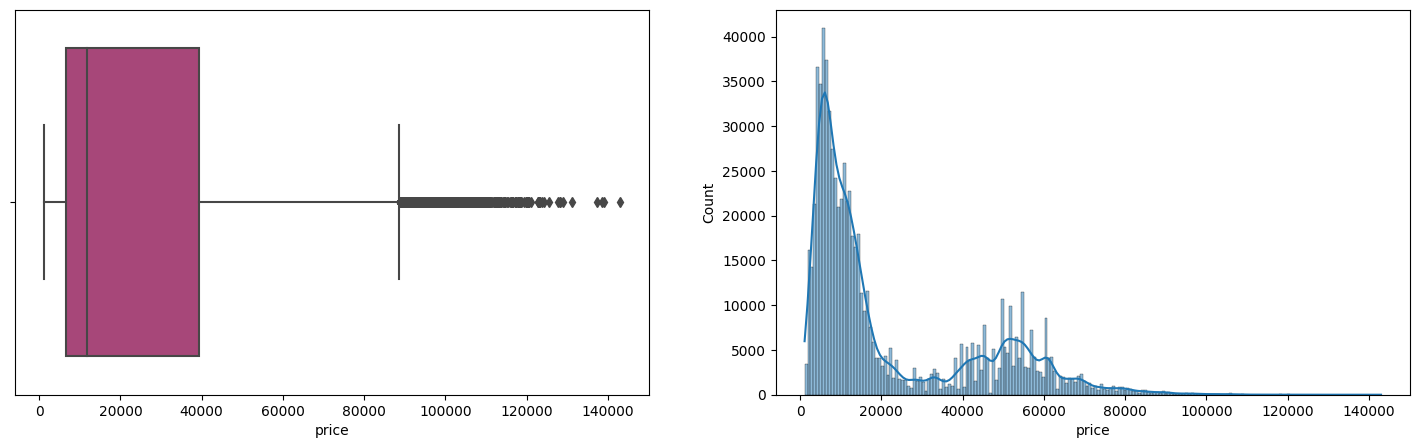

In [0]:
plt.figure(figsize = (18,5))
plt.subplot(1,2,2)
sns.histplot(x = 'price', data = pandas_merged, kde = True,palette = 'magma')
plt.subplot(1,2,1)
sns.boxplot(x = 'price', data = pandas_merged,palette = 'magma')

Text(0.5, 1.0, 'Airline prices based on the class and company')

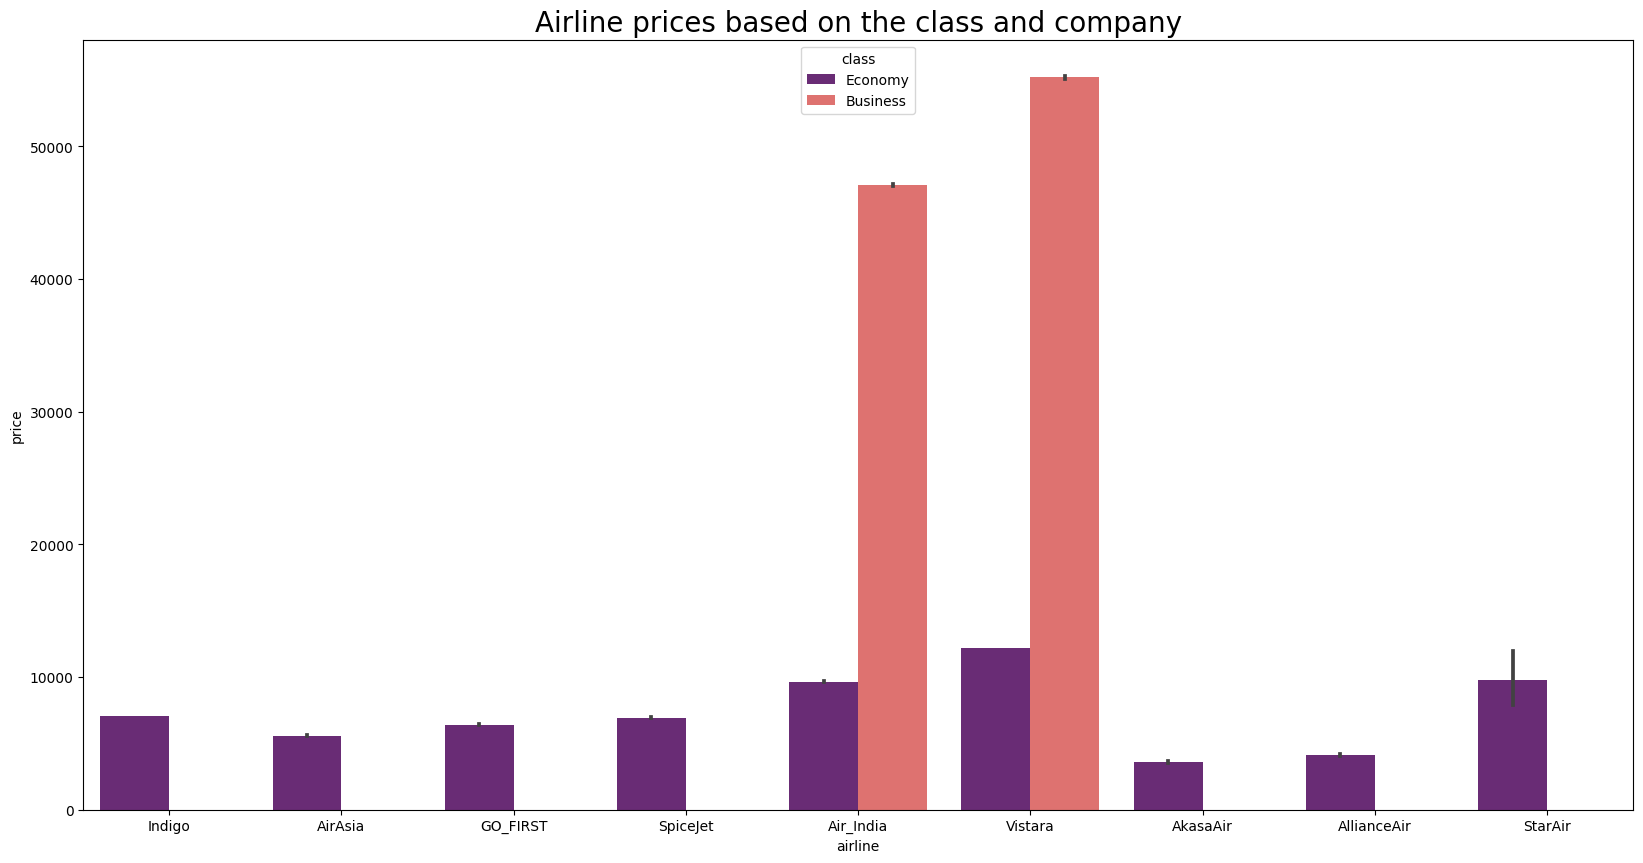

In [0]:
plt.figure(figsize=(20, 10))
sns.barplot(x='airline',y='price',hue="class",data=pandas_merged.sort_values("price"),palette='magma').set_title('Airline prices based on the class and company',fontsize=20)

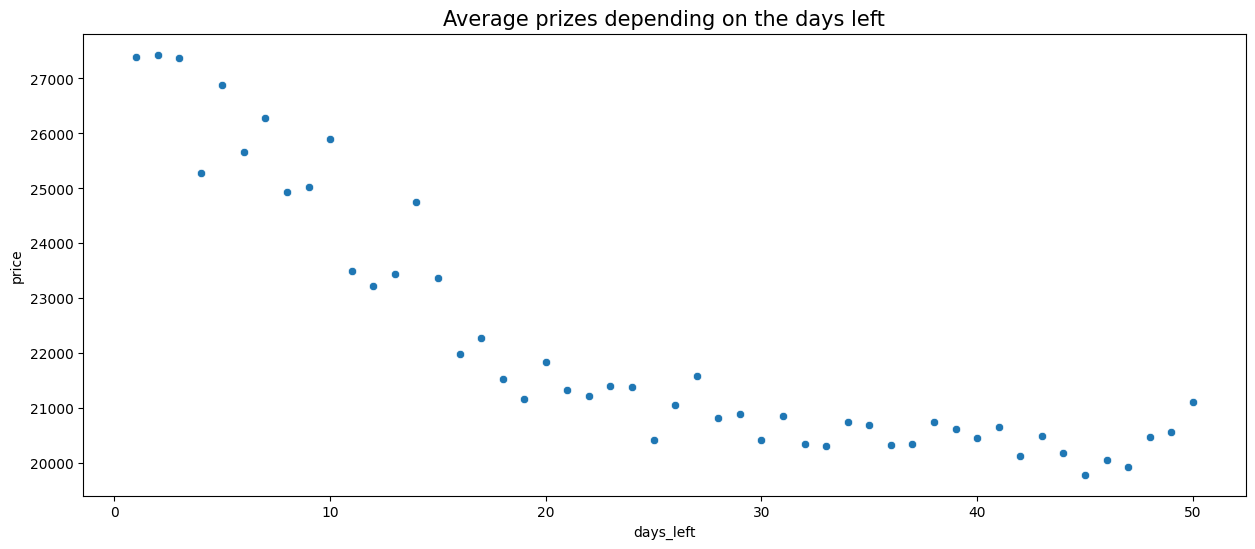

In [0]:
df_temp = pandas_merged.groupby(['days_left'])['price'].mean().reset_index()

plt.figure(figsize=(15,6))
ax = sns.scatterplot(x="days_left", y="price", data=df_temp,palette='magma').set_title("Average prizes depending on the days left",fontsize=15)

<AxesSubplot:xlabel='days_left', ylabel='price'>

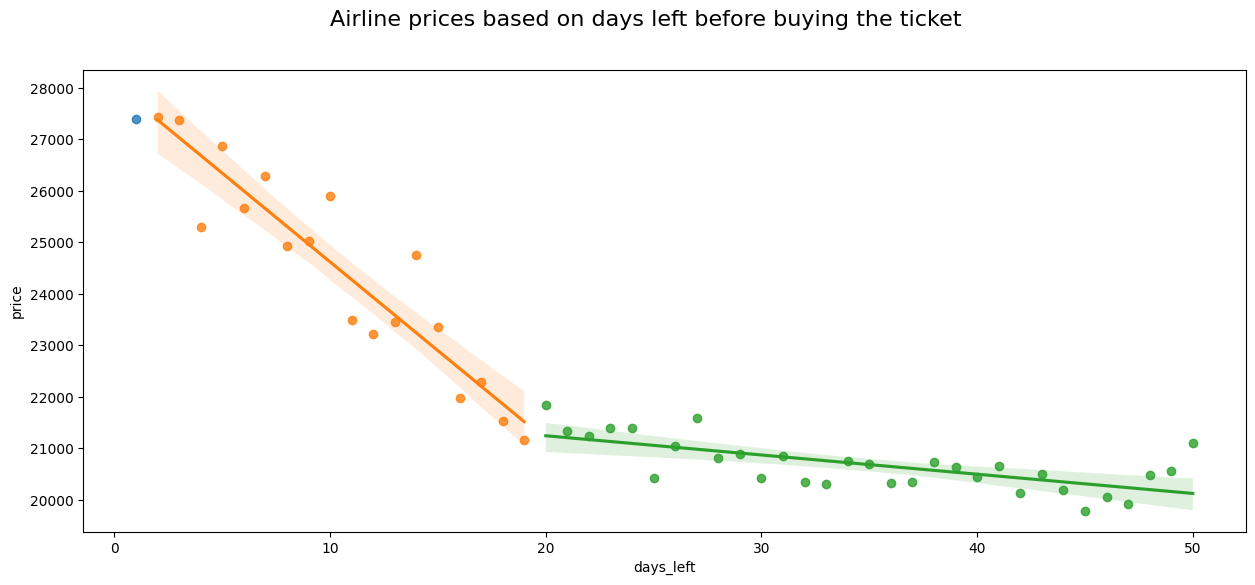

In [0]:
plt.figure(figsize=(15,6)).suptitle('Airline prices based on days left before buying the ticket', fontsize=16)
ax = plt.axes()
sns.regplot(x=df_temp.loc[df_temp["days_left"]==1].days_left, y=df_temp.loc[df_temp["days_left"]==1].price, fit_reg=False, ax=ax)
sns.regplot(x=df_temp.loc[(df_temp["days_left"]>1)&(df_temp["days_left"]<20)].days_left, y=df_temp.loc[(df_temp["days_left"]>1)&(df_temp["days_left"]<20)].price, fit_reg=True, ax=ax)
sns.regplot(x=df_temp.loc[df_temp["days_left"]>=20].days_left, y=df_temp.loc[df_temp["days_left"]>=20].price, fit_reg=True, ax=ax)

Text(0.5, 0.98, 'Airline prices based on the source and destination cities')

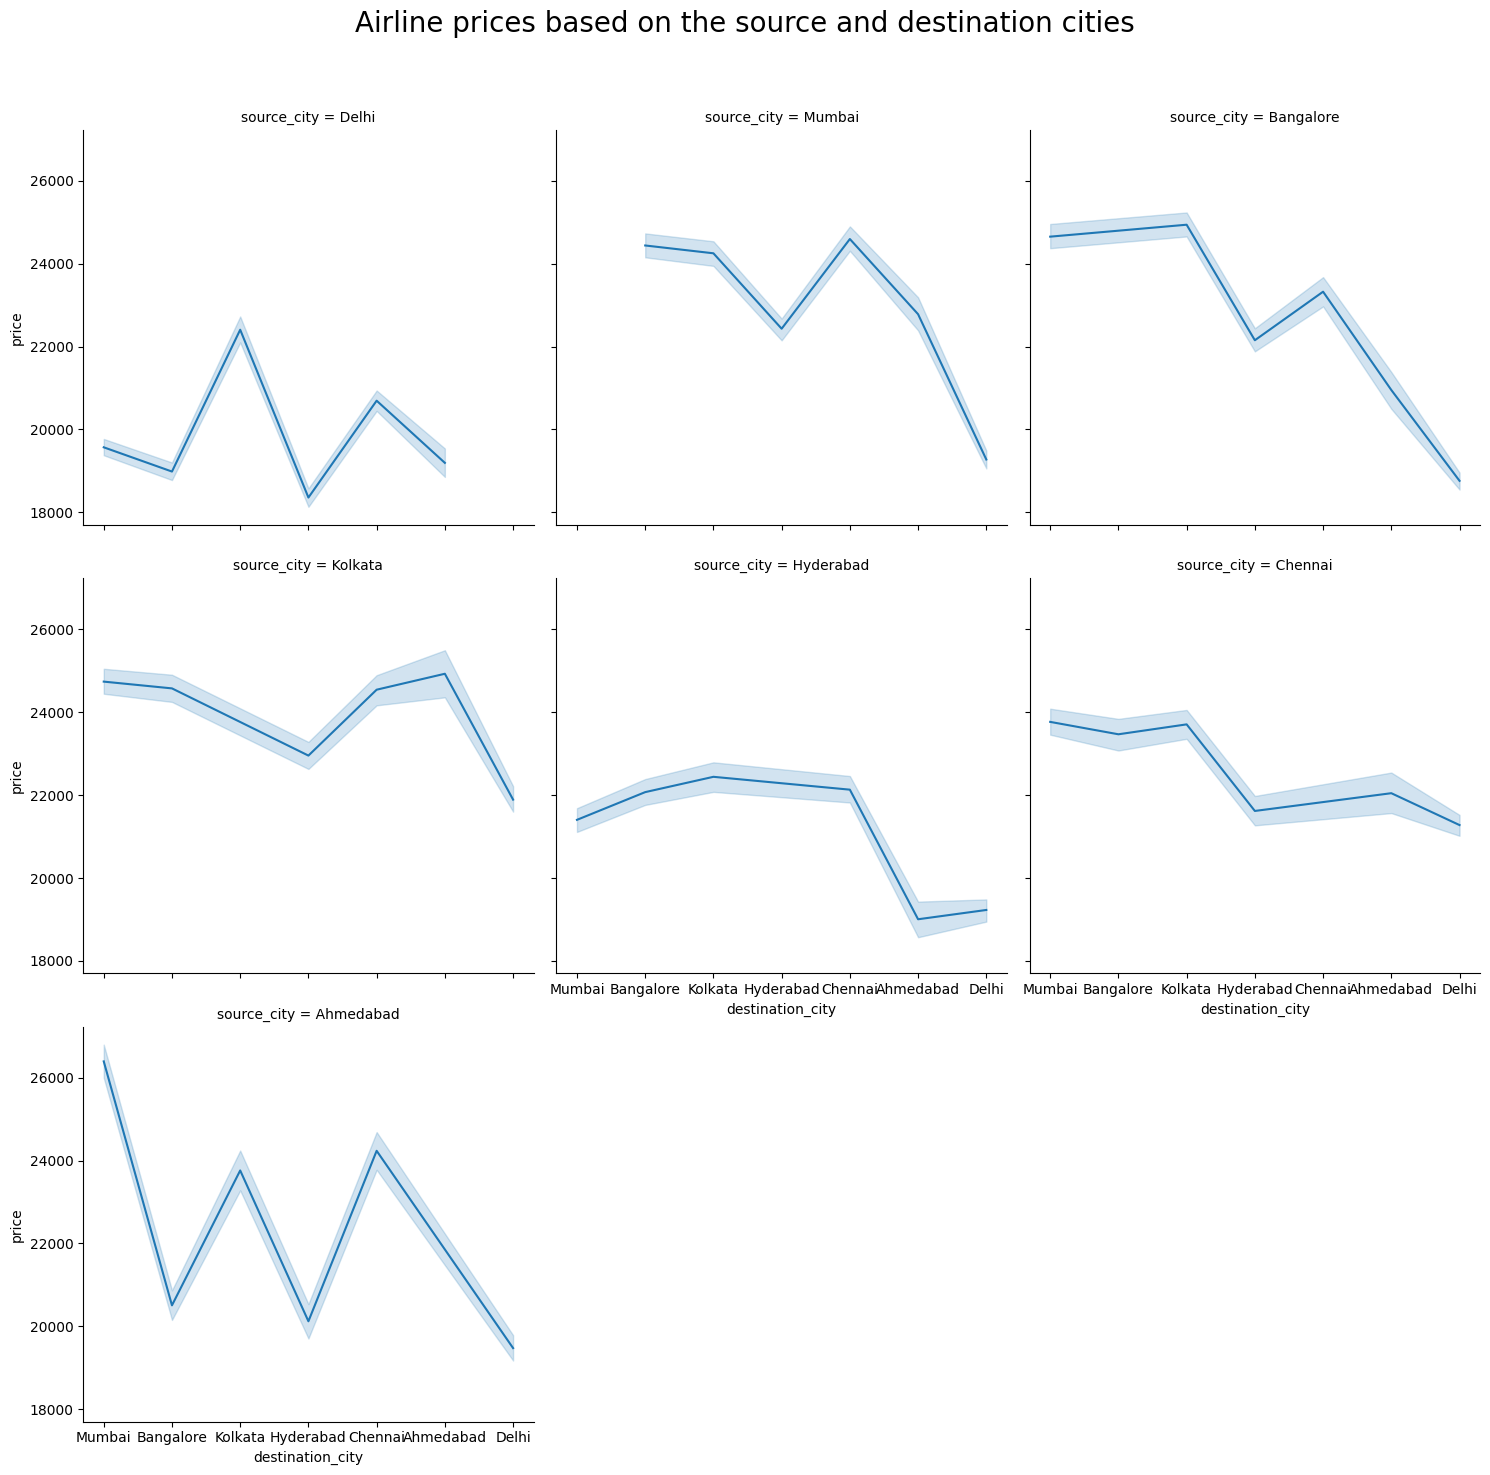

In [0]:
ax = sns.relplot(col="source_city", y="price", kind="line",x='destination_city', data=pandas_merged, col_wrap=3)
ax.fig.subplots_adjust(top=0.9) # adjust the Figure in rp
ax.fig.suptitle('Airline prices based on the source and destination cities',fontsize=20)

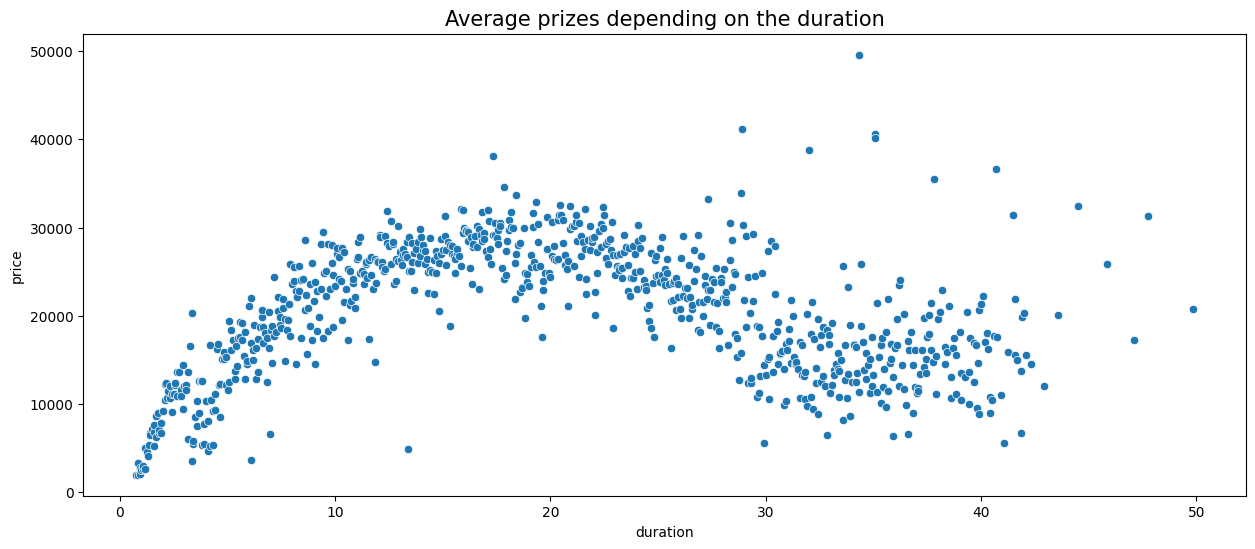

In [0]:
df_temp = pandas_merged.groupby(['duration'])['price'].mean().reset_index()

plt.figure(figsize=(15,6))
ax = sns.scatterplot(x="duration", y="price", data=df_temp,palette='magma').set_title("Average prizes depending on the duration",fontsize=15)

In [0]:
from sklearn.feature_selection import mutual_info_regression
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import mean_absolute_error, r2_score

In [0]:
def preprocessing(df):
    #Encode the ordinal variables "stops" and "class".
    df["stops"] = df["stops"].replace({'zero':0,'one':1,'two_or_more':2}).astype(int)
    df["class"] = df["class"].replace({'Economy':0,'Business':1}).astype(int)
    
    #Create the dummy variables for the cities, the times and the airlines.
    dummies_variables = ["airline","source_city","destination_city","departure_time","arrival_time"]
    dummies = pd.get_dummies(df[dummies_variables], drop_first= True)
    df = pd.concat([df,dummies],axis=1)
    
    #Create the dummy variables for the cities, the times and the airlines.
    df = df.drop(["flight","airline","source_city","destination_city","departure_time","arrival_time"],axis=1)
    
    return df

In [0]:
df_preprocessed = preprocessing(pandas_merged)

In [0]:
df_preprocessed.columns

Index(['stops', 'class', 'duration', 'days_left', 'price', 'airline_Air_India',
       'airline_AkasaAir', 'airline_AllianceAir', 'airline_GO_FIRST',
       'airline_Indigo', 'airline_SpiceJet', 'airline_StarAir',
       'airline_Vistara', 'source_city_Bangalore', 'source_city_Chennai',
       'source_city_Delhi', 'source_city_Hyderabad', 'source_city_Kolkata',
       'source_city_Mumbai', 'destination_city_Bangalore',
       'destination_city_Chennai', 'destination_city_Delhi',
       'destination_city_Hyderabad', 'destination_city_Kolkata',
       'destination_city_Mumbai', 'departure_time_6 AM - 12 PM',
       'departure_time_After 6 PM', 'departure_time_Before 6 AM',
       'arrival_time_6 AM - 12 PM', 'arrival_time_After 6 PM',
       'arrival_time_Before 6 AM'],
      dtype='object')

<AxesSubplot:>

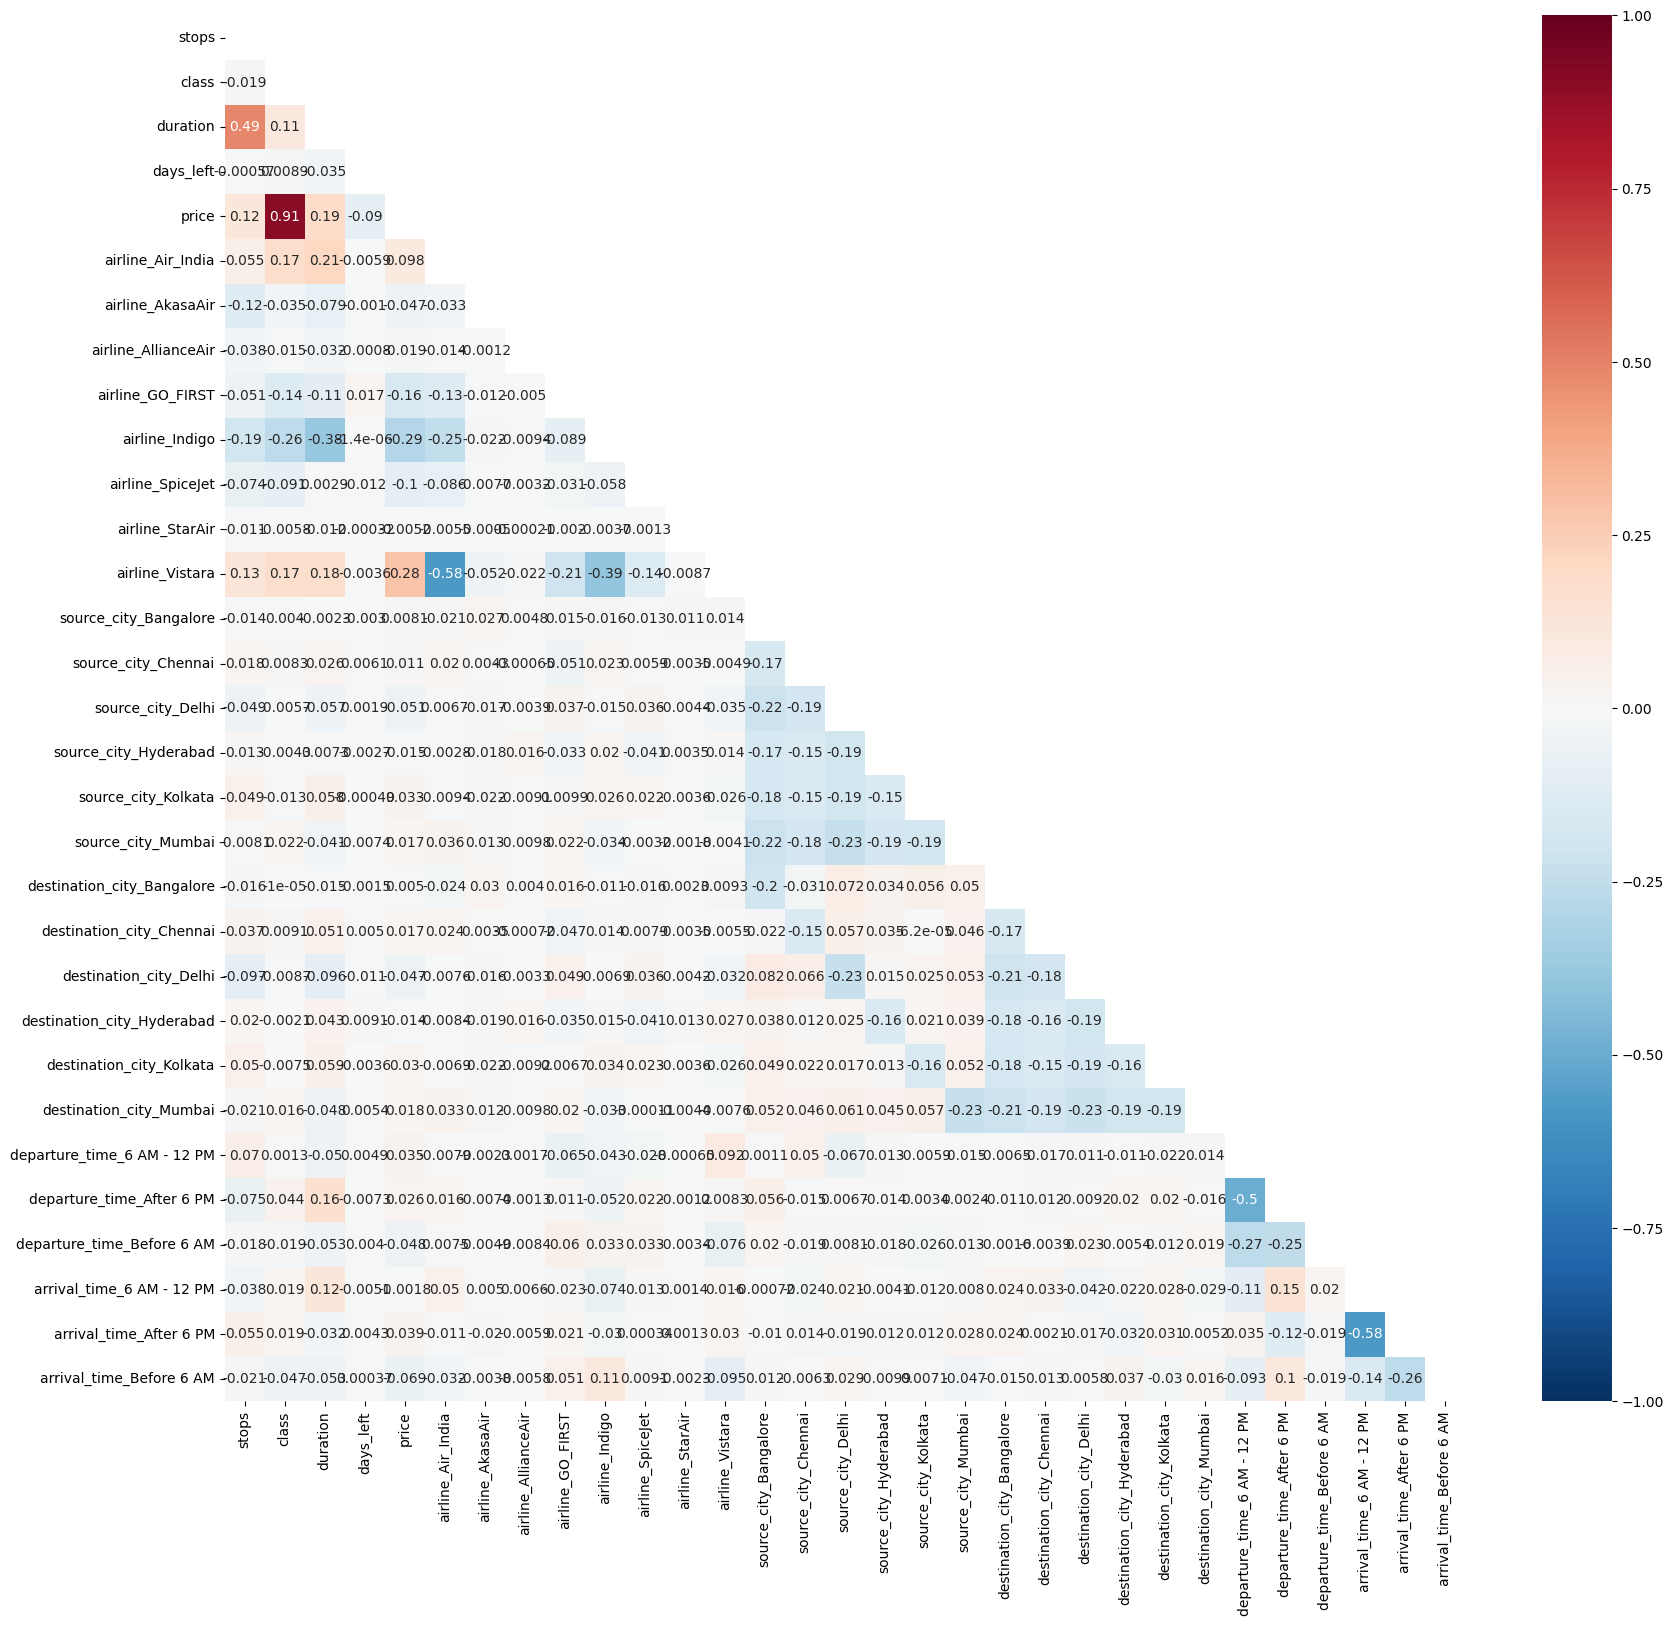

In [0]:
mask = np.triu(np.ones_like(df_preprocessed.corr(), dtype=bool))

plt.figure(figsize = (20,18))
sns.heatmap(df_preprocessed.corr(), data = df_preprocessed, mask=mask,annot = True, vmin= -1.0, vmax= 1.0, center = 0, cmap = 'RdBu_r')

In [0]:
def make_mi_scores(X, y):
    X = X.copy()
    for colname in X.select_dtypes(["object", "category"]):
        X[colname], _ = X[colname].factorize()
    # All discrete features should now have integer dtypes
    discrete_features = [pd.api.types.is_integer_dtype(t) for t in X.dtypes]
    mi_scores = mutual_info_regression(X, y, discrete_features=discrete_features, random_state=0)
    mi_scores = pd.Series(mi_scores, name="MI Scores", index=X.columns)
    mi_scores = mi_scores.sort_values(ascending=False)
    return mi_scores

In [0]:
X = df_preprocessed.copy()
y = X.pop("price")

mi_scores = make_mi_scores(X, y)

In [0]:
print(mi_scores.sort_values(ascending=False))

duration                       2.445115
class                          0.598389
airline_Vistara                0.458856
days_left                      0.458011
stops                          0.399243
source_city_Mumbai             0.384568
source_city_Delhi              0.381639
source_city_Bangalore          0.361060
airline_Air_India              0.360113
destination_city_Mumbai        0.334746
destination_city_Delhi         0.333204
destination_city_Bangalore     0.325198
source_city_Kolkata            0.311161
source_city_Hyderabad          0.302253
source_city_Chennai            0.299461
destination_city_Kolkata       0.280390
destination_city_Hyderabad     0.274107
destination_city_Chennai       0.271528
airline_Indigo                 0.253623
airline_GO_FIRST               0.125309
departure_time_Before 6 AM     0.093555
arrival_time_After 6 PM        0.090697
departure_time_6 AM - 12 PM    0.089094
departure_time_After 6 PM      0.088148
arrival_time_6 AM - 12 PM      0.082437


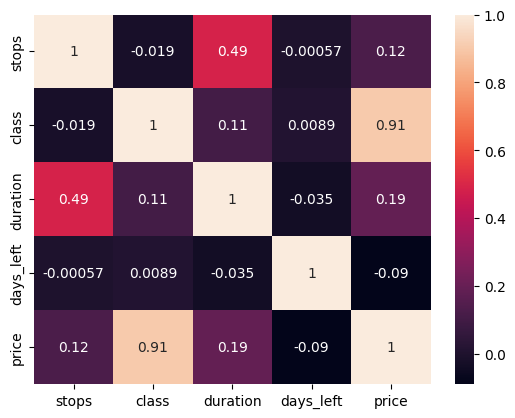

In [0]:
corr = pandas_merged.corr()
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, annot=True)
plt.show()

In [0]:
df_preprocessed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 752241 entries, 0 to 752240
Data columns (total 31 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   stops                        752241 non-null  int64  
 1   class                        752241 non-null  int64  
 2   duration                     752241 non-null  float64
 3   days_left                    752241 non-null  int32  
 4   price                        752241 non-null  int32  
 5   airline_Air_India            752241 non-null  uint8  
 6   airline_AkasaAir             752241 non-null  uint8  
 7   airline_AllianceAir          752241 non-null  uint8  
 8   airline_GO_FIRST             752241 non-null  uint8  
 9   airline_Indigo               752241 non-null  uint8  
 10  airline_SpiceJet             752241 non-null  uint8  
 11  airline_StarAir              752241 non-null  uint8  
 12  airline_Vistara              752241 non-null  uint8  
 13 

In [0]:
def bool_to_int(df):
    # df is a pandas DataFrame object
    # This function returns a copy of df with boolean values converted to integers
    df_copy = df.copy()
    for col in df_copy.columns:
        if df_copy[col].dtype == "bool":
            # Convert the boolean column to integer using astype method
            df_copy[col] = df_copy[col].astype("int")
    return df_copy

In [0]:
var1=bool_to_int(df_preprocessed)

In [0]:
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import mean_absolute_error, r2_score

from sklearn.cluster import KMeans

from sklearn.linear_model import LinearRegression
from xgboost import XGBRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import OneHotEncoder
import os

from scipy import stats

In [0]:
var1

,stops,class,duration,days_left,price,airline_Air_India,airline_AkasaAir,airline_AllianceAir,airline_GO_FIRST,airline_Indigo,airline_SpiceJet,airline_StarAir,airline_Vistara,source_city_Bangalore,source_city_Chennai,source_city_Delhi,source_city_Hyderabad,source_city_Kolkata,source_city_Mumbai,destination_city_Bangalore,destination_city_Chennai,destination_city_Delhi,destination_city_Hyderabad,destination_city_Kolkata,destination_city_Mumbai,departure_time_6 AM - 12 PM,departure_time_After 6 PM,departure_time_Before 6 AM,arrival_time_6 AM - 12 PM,arrival_time_After 6 PM,arrival_time_Before 6 AM
0,0,0,2.1700,1,5953,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0
1,0,0,2.3300,1,5953,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,1,0,0
2,0,0,2.1700,1,5956,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1
3,0,0,2.2500,1,5955,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0
4,0,0,2.3300,1,5955,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
752236,1,1,13.0833,50,65028,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0
752237,1,1,11.2500,50,69254,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0
752238,1,1,11.2500,50,69254,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0
752239,1,1,11.1667,50,72980,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0


In [0]:
var2=var1.price

In [0]:
var2

0          5953
1          5953
2          5956
3          5955
4          5955
          ...  
752236    65028
752237    69254
752238    69254
752239    72980
752240    72980
Name: price, Length: 752241, dtype: int32

In [0]:
var1.drop(columns='price',inplace=True)

In [0]:
var1

,stops,class,duration,days_left,airline_Air_India,airline_AkasaAir,airline_AllianceAir,airline_GO_FIRST,airline_Indigo,airline_SpiceJet,airline_StarAir,airline_Vistara,source_city_Bangalore,source_city_Chennai,source_city_Delhi,source_city_Hyderabad,source_city_Kolkata,source_city_Mumbai,destination_city_Bangalore,destination_city_Chennai,destination_city_Delhi,destination_city_Hyderabad,destination_city_Kolkata,destination_city_Mumbai,departure_time_6 AM - 12 PM,departure_time_After 6 PM,departure_time_Before 6 AM,arrival_time_6 AM - 12 PM,arrival_time_After 6 PM,arrival_time_Before 6 AM
0,0,0,2.1700,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0
1,0,0,2.3300,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,1,0,0
2,0,0,2.1700,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1
3,0,0,2.2500,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0
4,0,0,2.3300,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
752236,1,1,13.0833,50,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0
752237,1,1,11.2500,50,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0
752238,1,1,11.2500,50,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0
752239,1,1,11.1667,50,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0


In [0]:
var1['price']=var2

In [0]:
#independent variable
x=var1.iloc[:,:-1].values

#dependent variable
y=var1.iloc[:,-1].values

In [0]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=0)

In [0]:
from sklearn.linear_model import LinearRegression
regressor=LinearRegression()
regressor.fit(x_train,y_train)

LinearRegression()

In [0]:
y_pred=regressor.predict(x_test)
y_pred

array([20671.69070321, 17821.70144234,  7126.74296677, ...,
       16715.86194408, 12139.5271416 , 17084.8752602 ])

In [0]:
import statsmodels.api as sm
x_stats=sm.add_constant(x_train)
regsummary=sm.OLS(y_train,x_stats).fit()
regsummary.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.869
Model:                            OLS   Adj. R-squared:                  0.869
Method:                 Least Squares   F-statistic:                 1.250e+05
Date:                Tue, 29 Aug 2023   Prob (F-statistic):               0.00
Time:                        17:19:48   Log-Likelihood:            -5.8501e+06
No. Observations:              564180   AIC:                         1.170e+07
Df Residuals:                  564149   BIC:                         1.170e+07
Df Model:                          30                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       4170.2887     92.992     44.846      0.000    3988.027    4352.550
x1          5916.3103     29.590    199.945      0.000    5858.315    5974.305
x2          4.168e+04     24.565   1696.742      0.000    4.16e+04    4.17e+04
x3            44.9356      1.838     24.445      0.000      41.333      48.538
x4          -147.0161      0.734   -200.365      0.000    -148.454    -145.578
x5          1702.5518     56.413     30.180      0.000    1591.984    1813.120
x6          3410.7885    196.701     17.340      0.000    3025.261    3796.316
x7          3524.4244    450.284      7.827      0.000    2641.883    4406.966
x8          1753.3419     69.816     25.114      0.000    1616.505    1890.179
x9          2563.9920     57.699     44.437      0.000    2450.903    2677.081
x10         2303.1235     89.491     25.736      0.000    2127.723    2478.524
x11         7900.6865   1163.874      6.788      0.000    5619.531    1.02e+04
x12         6420.2179     54.352    118.124      0.000    6313.690    6526.746
x13         -523.3445     49.234    -10.630      0.000    -619.841    -426.848
x14         -815.5493     51.049    -15.976      0.000    -915.603    -715.495
x15        -2702.4056     48.530    -55.685      0.000   -2797.523   -2607.288
x16        -1961.1587     50.794    -38.610      0.000   -2060.713   -1861.604
x17         1513.9394     50.508     29.974      0.000    1414.945    1612.934
x18         -912.7722     48.479    -18.828      0.000   -1007.790    -817.755
x19         1565.2433     50.070     31.261      0.000    1467.107    1663.379
x20         1601.5379     51.637     31.015      0.000    1500.331    1702.744
x21         -426.5097     49.942     -8.540      0.000    -524.394    -328.625
x22           20.1512     51.040      0.395      0.693     -79.886     120.188
x23         3242.1104     51.110     63.434      0.000    3141.936    3342.285
x24         1482.8343     49.380     30.029      0.000    1386.051    1579.617
x25          139.9644     28.740      4.870      0.000      83.634     196.295
x26         -337.9144     29.551    -11.435      0.000    -395.834    -279.995
x27        -1342.0216     37.355    -35.926      0.000   -1415.236   -1268.807
x28        -1326.5371     32.516    -40.796      0.000   -1390.268   -1262.806
x29         -448.6515     28.299    -15.854      0.000    -504.116    -393.187
x30        -1669.1603     48.802    -34.202      0.000   -1764.812   -1573.509
==============================================================================
Omnibus:                   102053.602   Durbin-Watson:                   2.003
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           740605.226
Skew:                           0.682   Prob(JB):                         0.00
Kurtosis:                       8.445   Cond. No.                     3.57e+03
==

In [0]:
# from sklearn.ensemble import RandomForestRegressor
# rf=RandomForestRegressor(n_estimators=200,random_state=0)
# rf.fit(x_train,y_train)

In [0]:
# y_pred_rf=rf.predict(x_test)

In [0]:
# y_pred_rf

In [0]:
# metrics.r2_score(y_test,y_pred_rf)

In [0]:
import xgboost as xgb

RegModel=XGBRegressor(max_depth=3, learning_rate=0.1, n_estimators=500, objective='reg:linear', booster='gbtree')
XGB=RegModel.fit(x_train,y_train)

[17:19:49] WARNING: ../src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


In [0]:
prediction=XGB.predict(x_test)

In [0]:
from sklearn import metrics
metrics.r2_score(y_test,prediction)

0.918263003352031

In [0]:
xgb_r = xgb.XGBRegressor(objective ='reg:linear',n_estimators = 300, seed = 123)
XGB2=xgb_r.fit(x_train,y_train)

[17:21:10] WARNING: ../src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


In [0]:
prediction2=XGB2.predict(x_test)
metrics.r2_score(y_test,prediction2)

0.949547495495664